# Project

### Group 5 Member
1. Chancheep Mahacharoensuk 6288092
2. Pattadon Singhajan 6288127
3. Kantapong Matangkarat 6288160

In [76]:
#import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [77]:
#read csv file

df = pd.read_csv('data/owid-covid-data.csv')

# Step 1: Remove duplicate or irrelevant observations

In [78]:
df.isna().sum()

iso_code                                        0
continent                                    9995
location                                        0
date                                            0
total_cases                                  3040
                                            ...  
human_development_index                     30197
excess_mortality_cumulative_absolute       161270
excess_mortality_cumulative                161270
excess_mortality                           161270
excess_mortality_cumulative_per_million    161270
Length: 67, dtype: int64

In [79]:
## drop columns that has null more than 150000
df.drop(df.columns[df.isna().sum()> 150000], axis = 1, inplace = True)

In [80]:
# check all column
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',

In [81]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.639770e+05,1.638430e+05,1.618580e+05,1.461080e+05,146151.000000,144050.000000,163216.000000,163082.000000,161103.000000,145360.000000,...,139077.000000,91590.000000,137345.000000,144546.000000,106488.000000,105027.000000,68854.000000,124174.000000,155913.000000,136820.000000
mean,2.560297e+06,1.164153e+04,1.164055e+04,5.791914e+04,170.941143,172.546963,29825.981701,168.196259,167.033507,512.154301,...,19642.207419,13.581206,260.227222,8.211348,10.626991,32.778648,50.786567,3.027706,73.575944,0.725574
std,1.560856e+07,8.477591e+04,8.294513e+04,3.034096e+05,831.419443,816.374300,52749.291587,713.462096,537.503867,787.876999,...,20645.814721,20.022162,119.864451,4.495628,10.557987,13.524077,31.811432,2.449998,7.491446,0.149962
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,2.023000e+03,1.000000e+00,7.000000e+00,7.975000e+01,0.000000,0.143000,627.713000,0.041000,1.630000,18.658000,...,4449.898000,0.600000,168.711000,5.310000,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000
50%,2.630900e+04,7.900000e+01,1.074290e+02,7.860000e+02,2.000000,2.429000,4785.983000,11.438500,18.890000,129.307500,...,12951.839000,2.200000,243.811000,7.170000,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000
75%,3.016040e+05,1.066000e+03,1.151964e+03,7.332000e+03,20.000000,21.286000,38224.621250,101.506500,121.477000,717.944500,...,27936.896000,21.200000,329.942000,10.430000,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000
max,4.497273e+08,4.206334e+06,3.444237e+06,6.014690e+06,18020.000000,14689.143000,706541.904000,77691.083000,16052.608000,6332.605000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000


In [82]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [83]:
#keep only column that we want
continent_infect = df[['iso_code','continent','location','date','total_cases_per_million','total_deaths_per_million','gdp_per_capita','population','population_density','extreme_poverty','aged_65_older','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','hosp_patients_per_million','icu_patients_per_million','hospital_beds_per_thousand' , 'people_fully_vaccinated']]

In [84]:
continent_infect

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,AFG,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,AFG,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,AFG,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,AFG,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,ZWE,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,ZWE,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,ZWE,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,ZWE,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [85]:
continent_infect['continent'].value_counts()

Africa           39582
Europe           37242
Asia             36344
North America    25033
South America     9556
Oceania           9265
Name: continent, dtype: int64

In [86]:
continent_infect.isna().sum()

iso_code                                    0
continent                                9995
location                                    0
date                                        0
total_cases_per_million                  3801
total_deaths_per_million                21657
gdp_per_capita                          27940
population                               1078
population_density                      18477
extreme_poverty                         75427
aged_65_older                           30116
total_vaccinations_per_hundred         121457
people_vaccinated_per_hundred          123696
people_fully_vaccinated_per_hundred    126424
total_boosters_per_hundred             149197
hosp_patients_per_million              142333
icu_patients_per_million               143479
hospital_beds_per_thousand              42843
people_fully_vaccinated                126424
dtype: int64

In [87]:
continent_infect = continent_infect[continent_infect['continent'].notnull()]
continent_infect

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,AFG,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,AFG,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,AFG,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,AFG,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,ZWE,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,ZWE,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,ZWE,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,ZWE,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [88]:
continent_infect = continent_infect[continent_infect['population'].notna()]
continent_infect

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,AFG,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,AFG,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,AFG,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,AFG,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,ZWE,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,ZWE,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,ZWE,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,ZWE,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [89]:
continent_infect[continent_infect['hosp_patients_per_million'].isna()]

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,AFG,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,AFG,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,AFG,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,AFG,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,ZWE,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,ZWE,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,ZWE,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,ZWE,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [90]:
#fill the na to 0
continent_infect = continent_infect.fillna({'total_cases_per_million': 0, 'total_deaths_per_million': 0, 'total_vaccinations_per_hundred': 0 })


In [91]:
continent_infect.isna().sum()

iso_code                                    0
continent                                   0
location                                    0
date                                        0
total_cases_per_million                     0
total_deaths_per_million                    0
gdp_per_capita                          18405
population                                  0
population_density                       8942
extreme_poverty                         65892
aged_65_older                           20581
total_vaccinations_per_hundred              0
people_vaccinated_per_hundred          118672
people_fully_vaccinated_per_hundred    121188
total_boosters_per_hundred             142874
hosp_patients_per_million              132021
icu_patients_per_million               133167
hospital_beds_per_thousand              33308
people_fully_vaccinated                121188
dtype: int64

In [92]:
#check column type
continent_infect.dtypes 

iso_code                                object
continent                               object
location                                object
date                                    object
total_cases_per_million                float64
total_deaths_per_million               float64
gdp_per_capita                         float64
population                             float64
population_density                     float64
extreme_poverty                        float64
aged_65_older                          float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
total_boosters_per_hundred             float64
hosp_patients_per_million              float64
icu_patients_per_million               float64
hospital_beds_per_thousand             float64
people_fully_vaccinated                float64
dtype: object

In [93]:
#split the data from continent_infect to other variable by seperated by using continent
africa_infect = continent_infect[continent_infect['continent'] == 'Africa']
europe_infect = continent_infect[continent_infect['continent'] == 'Europe']
asia_infect = continent_infect[continent_infect['continent'] == 'Asia']
north_america_infect = continent_infect[continent_infect['continent'] == 'North America']
south_america_infect = continent_infect[continent_infect['continent'] == 'South America']
america_infect = continent_infect[continent_infect['continent'].isin(['North America', 'South America'])]
oceania_infect = continent_infect[continent_infect['continent'] == 'Oceania']

# America
### Which countries in America have highest no of cases and deaths per million ?


In [94]:
am_top10_totalcases = america_infect.groupby('location', as_index=False).max('date').sort_values('total_cases_per_million', ascending = False).head(10)
am_top10_totalcases

,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
3,Aruba,314678.856,1977.704,35973.781,107195.0,584.800,NaN,13.085,156.86,81.67,75.20,NaN,NaN,NaN,NaN,80608.0
13,Cayman Islands,297918.734,270.685,49903.029,66498.0,256.496,NaN,NaN,215.43,92.49,89.82,NaN,NaN,NaN,NaN,59726.0
9,Bonaire Sint Eustatius and Saba,288636.793,1172.244,NaN,26445.0,NaN,NaN,NaN,135.55,72.26,63.29,NaN,NaN,NaN,NaN,16736.0
46,Uruguay,246082.524,2025.450,20551.409,3485152.0,19.751,0.1,14.655,218.71,85.07,78.38,55.26,NaN,NaN,2.80,2731639.0
45,United States,238406.168,2889.154,54225.446,332915074.0,35.608,1.2,15.413,167.34,76.57,64.90,28.68,464.19,86.782,2.77,215466571.0
18,Curacao,237778.830,1601.981,NaN,164796.0,362.644,NaN,16.367,148.75,64.98,59.64,24.14,NaN,NaN,NaN,98278.0
24,Greenland,207937.680,351.692,NaN,56868.0,0.137,NaN,NaN,140.23,72.52,67.70,NaN,NaN,NaN,NaN,38502.0
11,British Virgin Islands,200210.367,2037.932,NaN,30423.0,207.973,NaN,NaN,120.34,62.20,56.95,NaN,NaN,NaN,NaN,17325.0
2,Argentina,196232.880,2782.561,18933.907,45605823.0,16.177,0.6,11.198,206.93,88.64,79.50,38.14,NaN,174.736,5.00,36256855.0
5,Barbados,195948.670,1122.666,16978.068,287708.0,664.463,NaN,14.952,107.95,55.79,52.16,NaN,NaN,NaN,5.80,150066.0


[Text(0.5, 1.0, 'Number of total cases per million')]

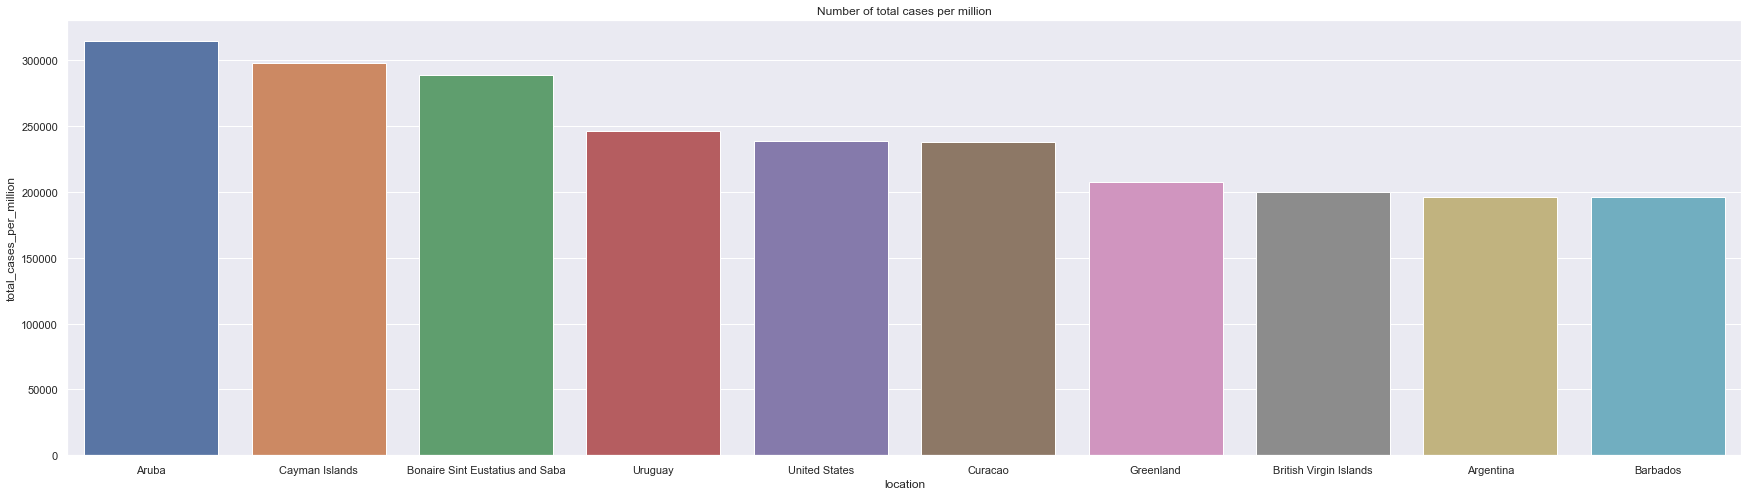

In [95]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.barplot(x="location", y="total_cases_per_million", data=am_top10_totalcases).set(title='Number of total cases per million')


[Text(0.5, 1.0, 'Number of total deaths per million')]

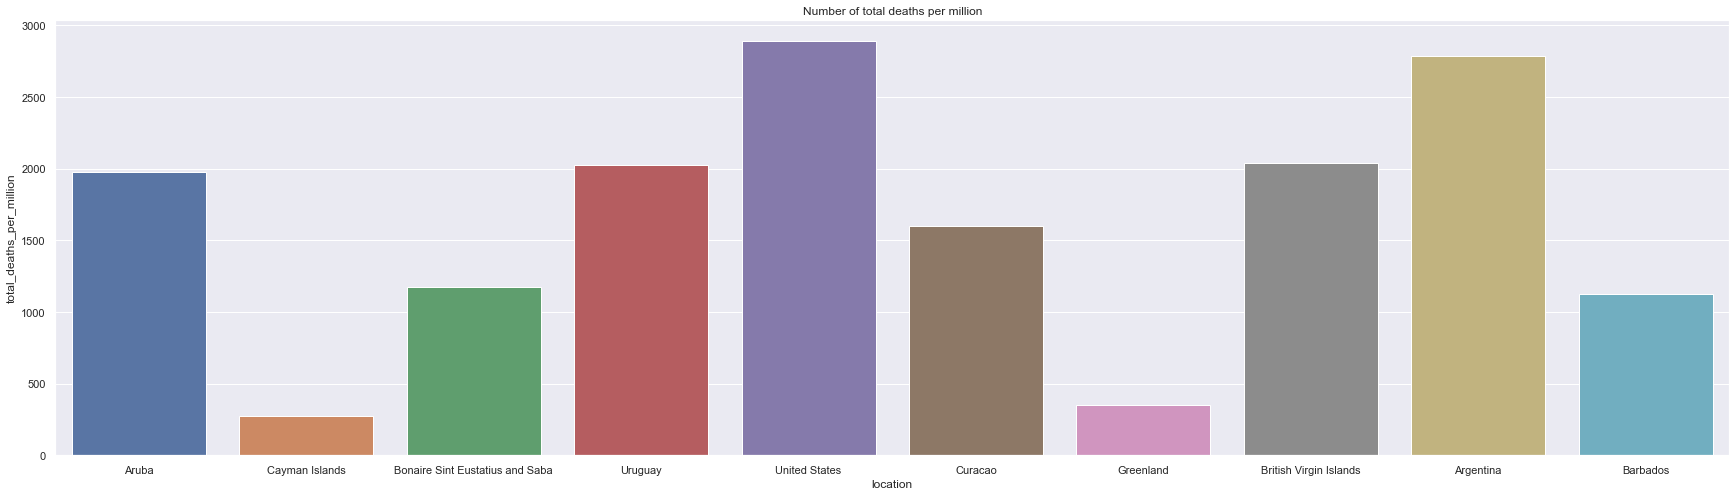

In [96]:
sns.barplot(x="location", y="total_deaths_per_million", data=am_top10_totalcases).set(title='Number of total deaths per million')

From the above two graphs we can conclude the total cases are high in countries like Aruba, Cayman island, etc. but the death rate is low. Highest death rate is observed in United States and Argentina

In [97]:
am_top10 = ['Aruba', 'Cayman Islands', 'Bonaire Sint Eustatius and Saba', 'Uruguay', 'United States', 'Curacao', 'Greenland', 'British Virgin Islands', 'Argentina', 'Barbados']
am_top10_fully_vaccinated = america_infect[america_infect['location'].isin(am_top10)].groupby('location', as_index=False).max('date').sort_values('people_fully_vaccinated', ascending = False).head(10)



Text(0.5, 1.0, 'Number of people fully vaccinated')

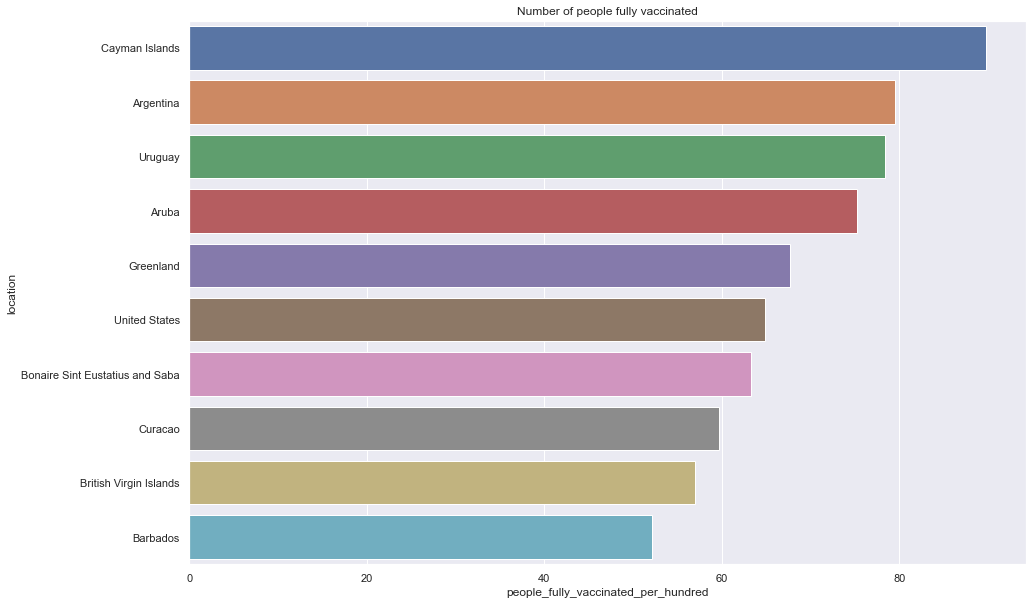

In [98]:
f, ax = plt.subplots(figsize=(15, 10))
df = am_top10_fully_vaccinated.groupby('location' , as_index=False).mean().sort_values('people_fully_vaccinated_per_hundred', ascending = False)
sns.set_color_codes("muted")
sns.barplot(x="people_fully_vaccinated_per_hundred", y="location", data=df )
ax.set_title('Number of people fully vaccinated')


We conclude that Countries, where people get fully vaccinated tend to have a lower number of deaths per million. For example, the Cayman Islands and Aruba have the highest number of total cases, but fewer deaths are with the highest number of fully vaccinated. But all this depends on the population as well.

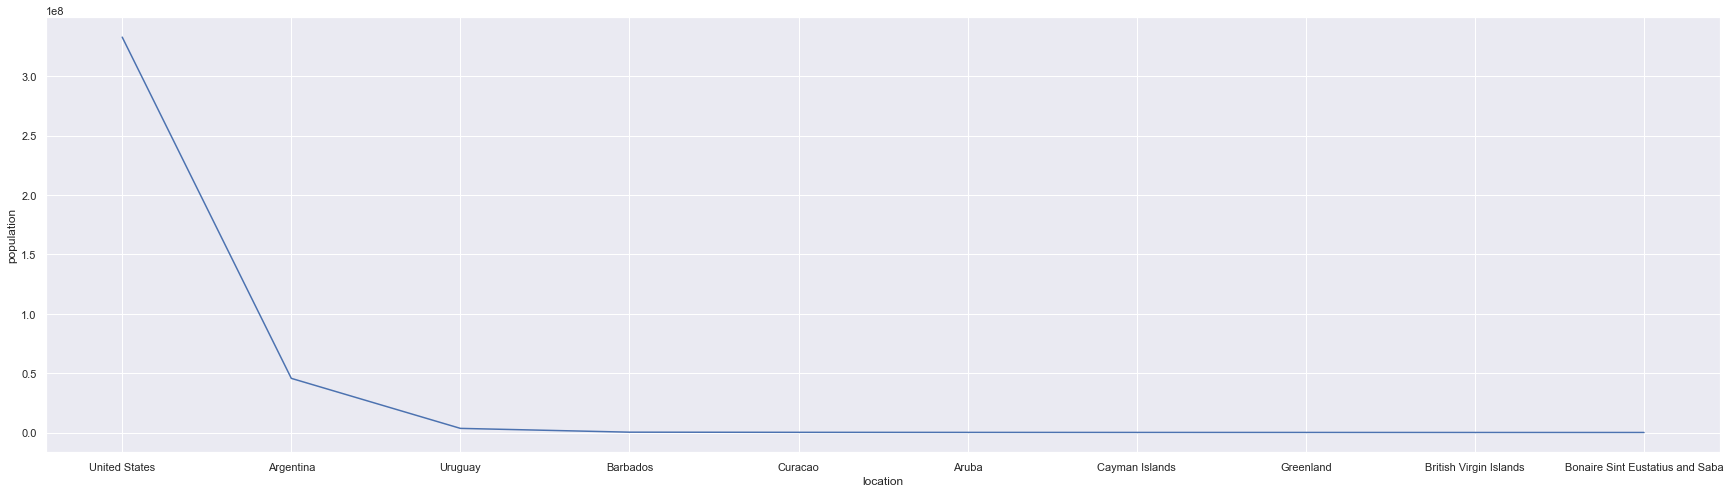

In [99]:
sns.lineplot(x="location", y="population", data=am_top10_fully_vaccinated)
plt.show()

The number of population is affect the total number of deaths. If the population is high, the number of total will be high than any lower countries<br/>

------------------------------------------------------------------------------------------------------------------------------------

# Asia 



[Text(0.5, 1.0, 'Number of total cases per million in Asia')]

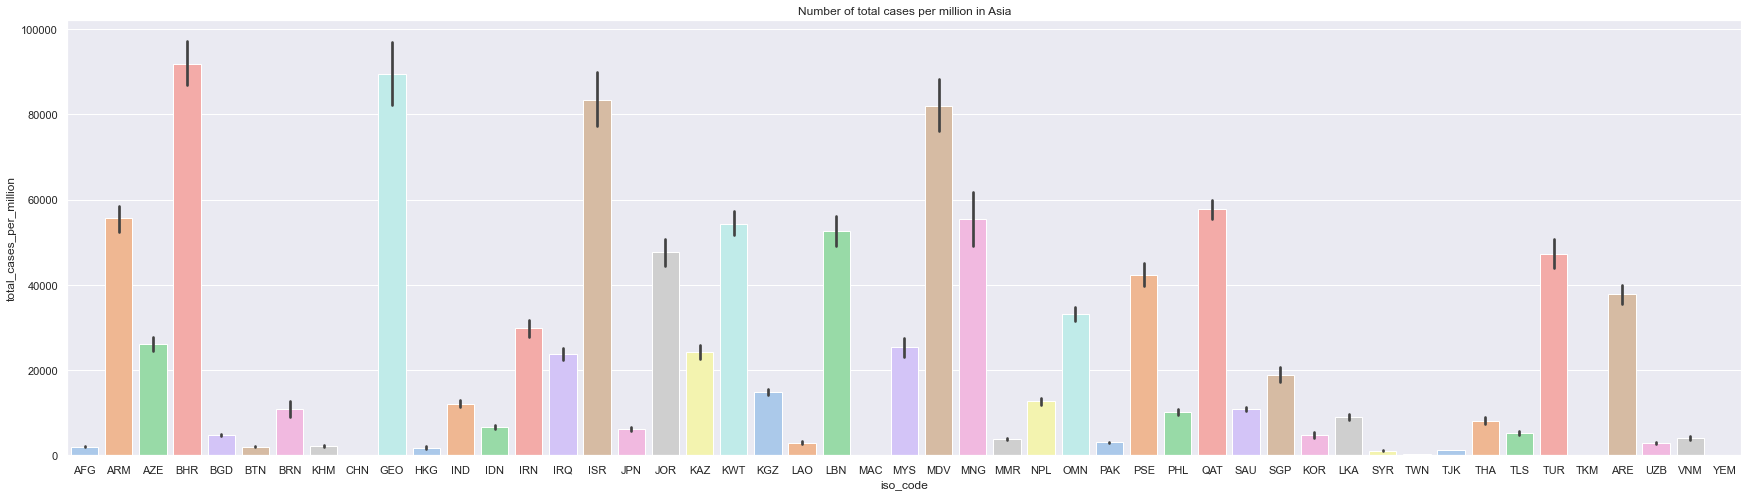

In [100]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.barplot(x="iso_code", y="total_cases_per_million", data=asia_infect ,palette='pastel').set(title='Number of total cases per million in Asia')


[Text(0.5, 1.0, 'Number of total deaths per million in Asia')]

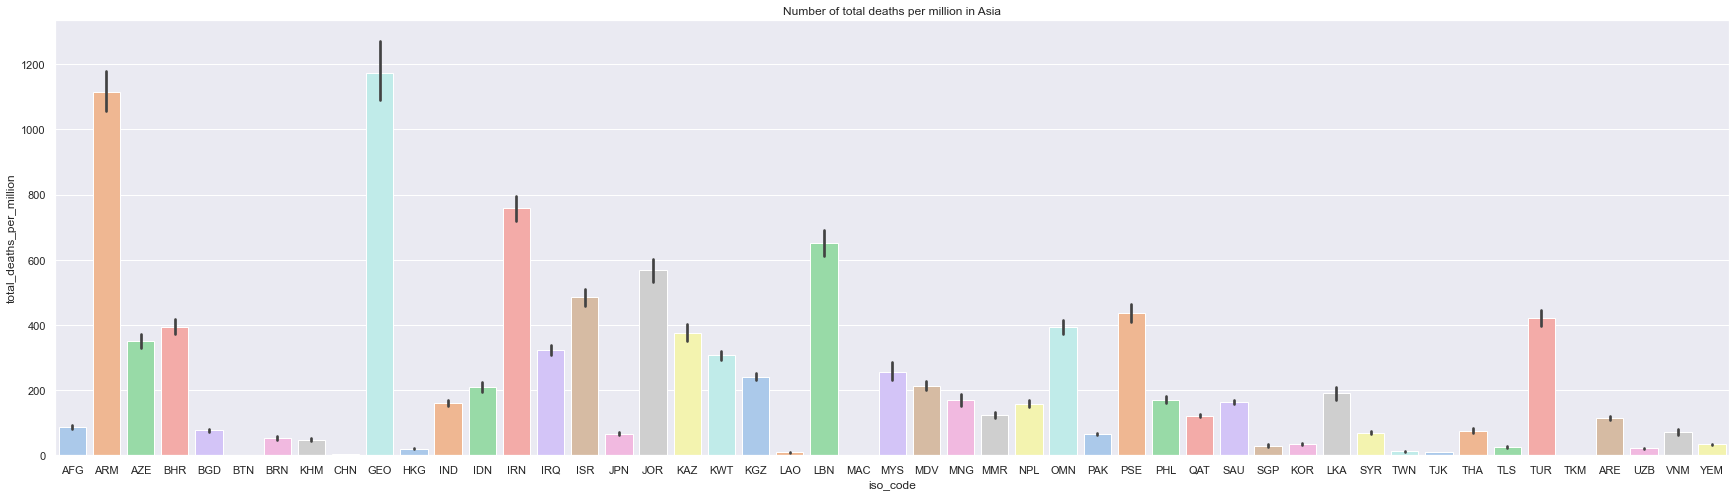

In [101]:
sns.barplot(x="iso_code", y="total_deaths_per_million", data=asia_infect ,palette='pastel').set(title='Number of total deaths per million in Asia')

[Text(0.5, 1.0, 'population density in Asia')]

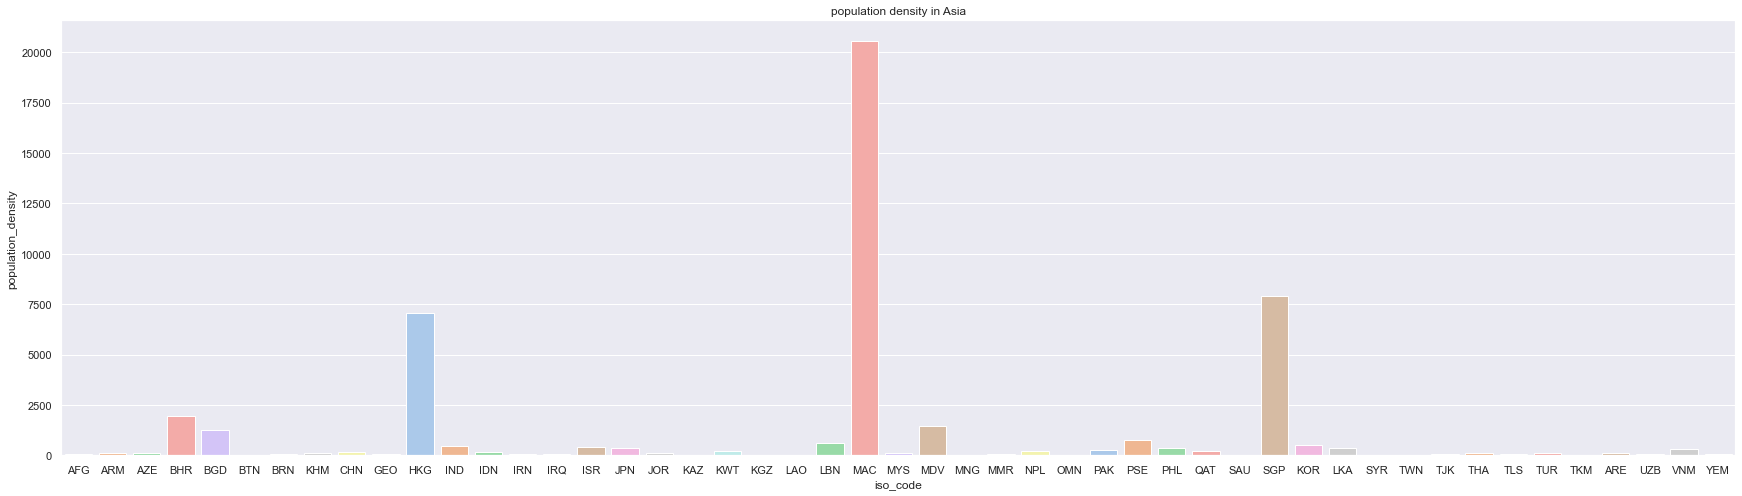

In [102]:
sns.barplot(x="iso_code", y="population_density", data=asia_infect ,palette='pastel').set(title='population density in Asia')

[Text(0.5, 1.0, 'gdp_per_capita in Asia')]

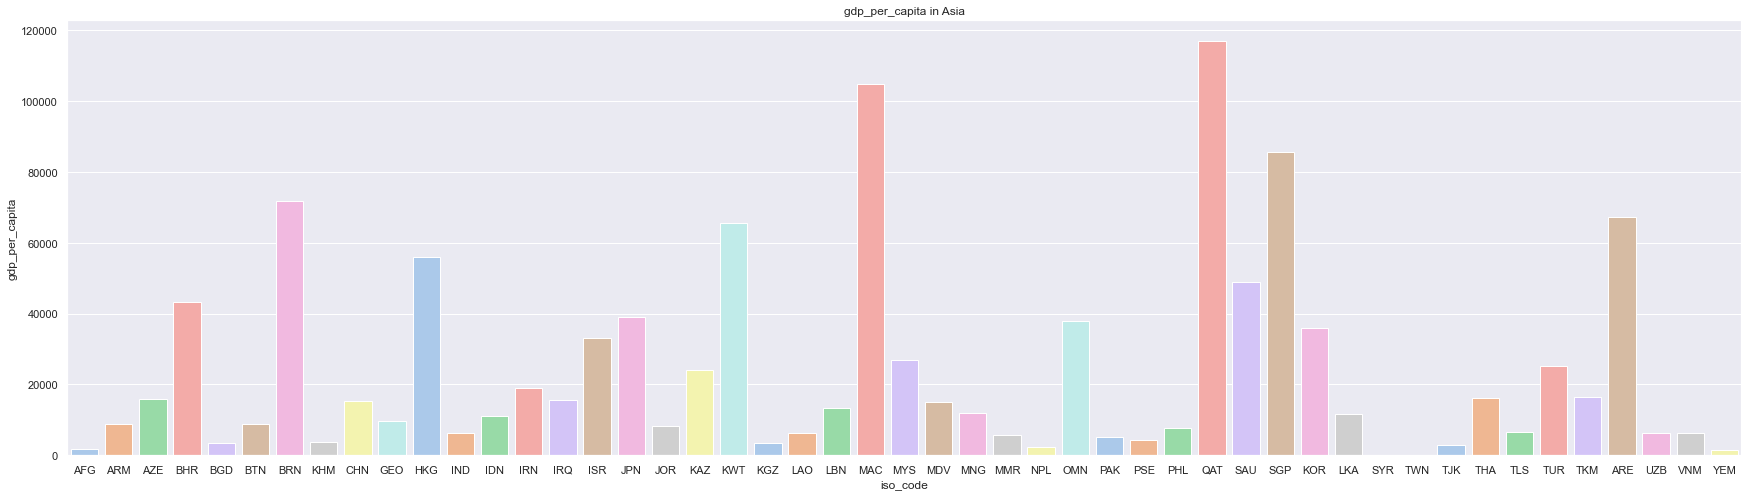

In [103]:
sns.barplot(x="iso_code", y="gdp_per_capita", data=asia_infect ,palette='pastel').set(title='gdp_per_capita in Asia')

[Text(0.5, 1.0, 'total_vaccinations_per_hundred in Asia')]

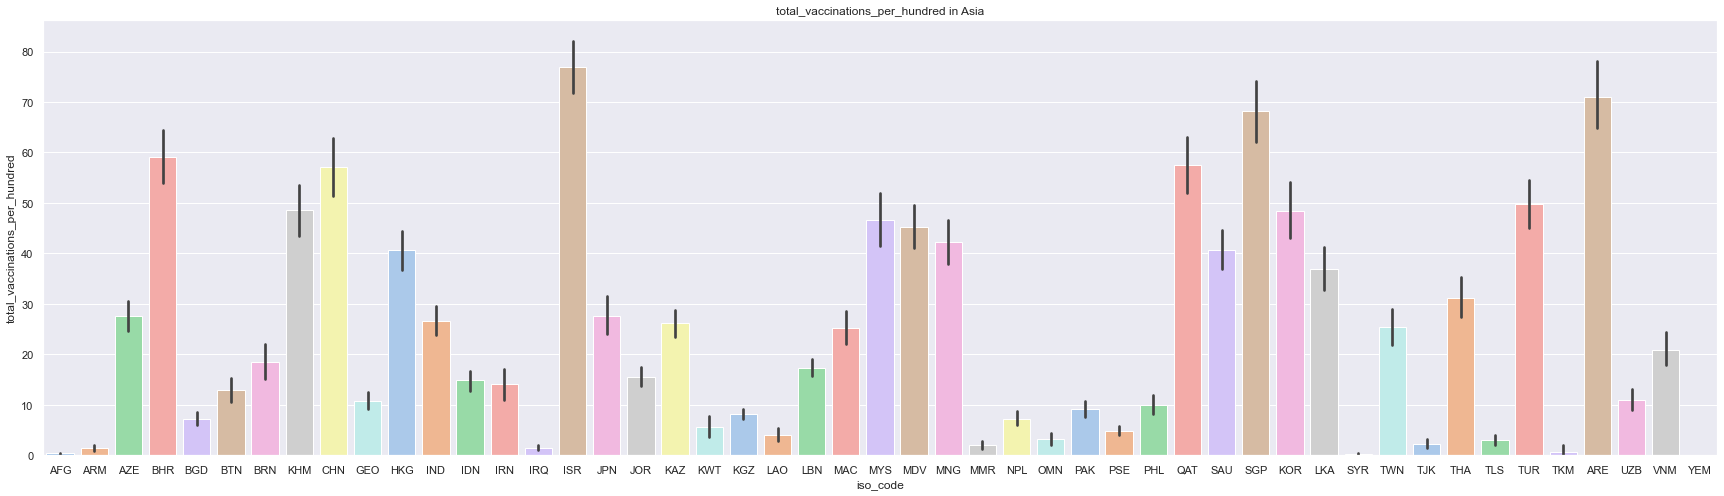

In [104]:
sns.barplot(x="iso_code", y="total_vaccinations_per_hundred", data=asia_infect ,palette='pastel').set(title='total_vaccinations_per_hundred in Asia')

# Africa

[Text(0.5, 1.0, 'Number of total cases per million')]

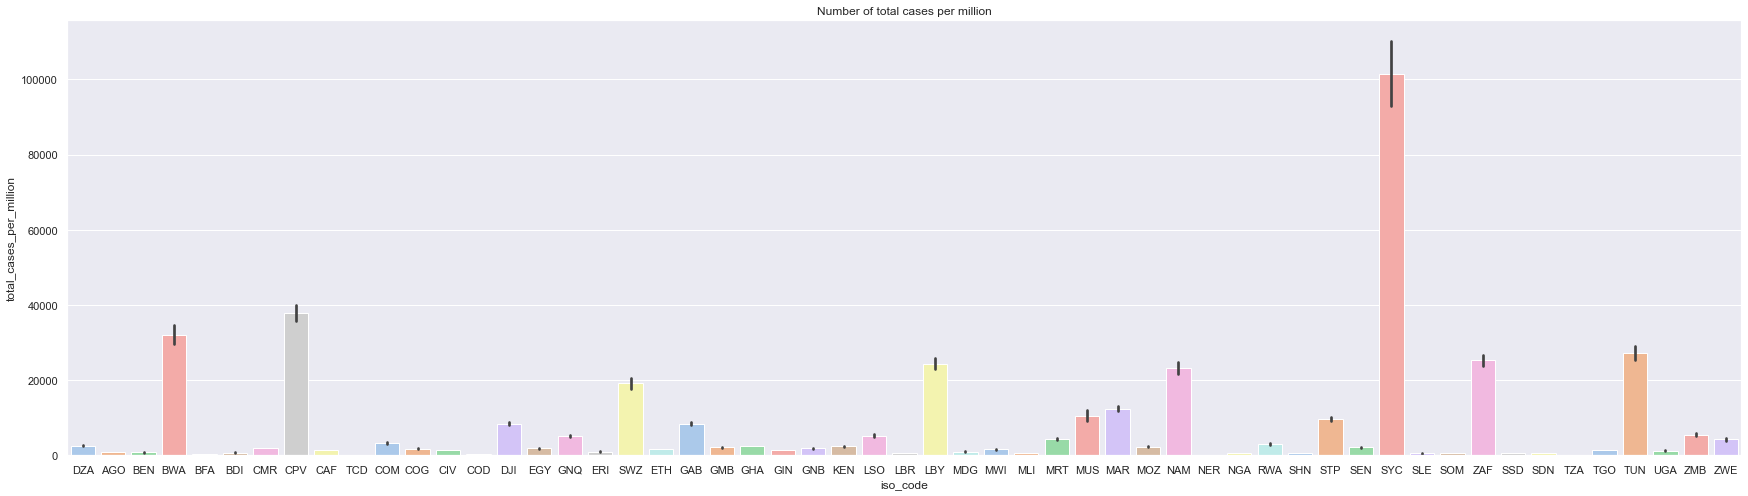

In [106]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.barplot(x="iso_code", y="total_cases_per_million", data=africa_infect ,palette='pastel').set(title='Number of total cases per million')


[Text(0.5, 1.0, 'Number of total deaths per million')]

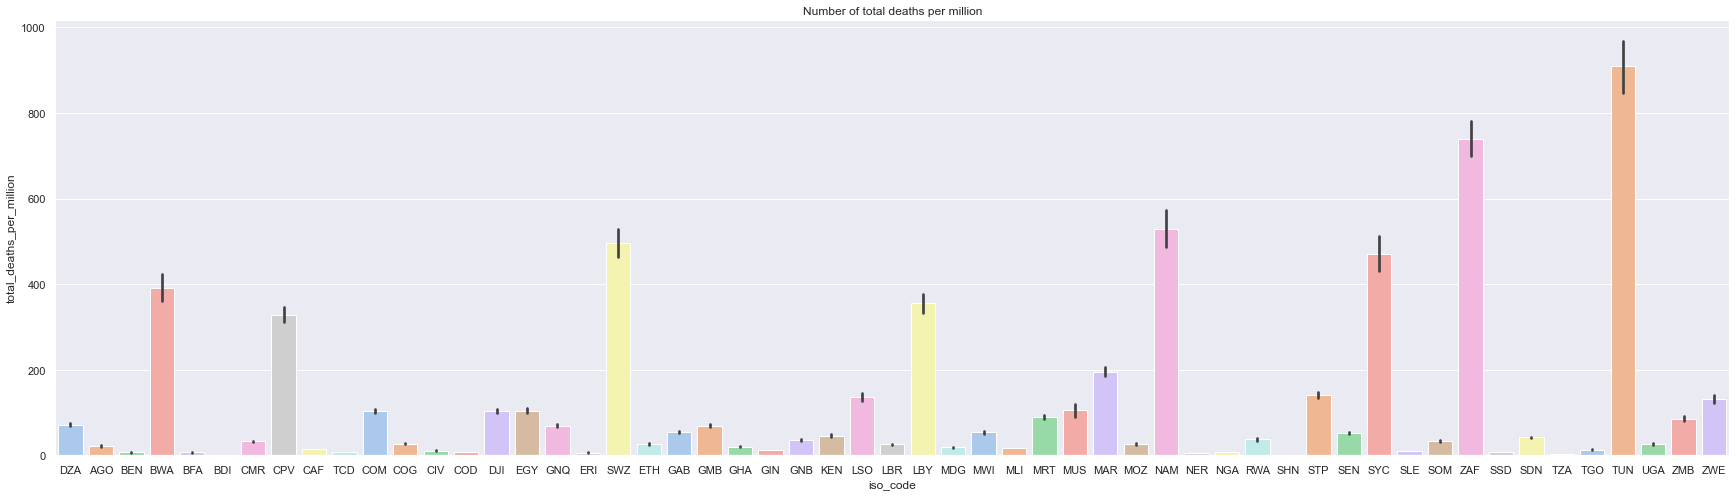

In [107]:
sns.barplot(x="iso_code", y="total_deaths_per_million", data=africa_infect ,palette='pastel').set(title='Number of total deaths per million')

[Text(0.5, 1.0, 'population density in Africa')]

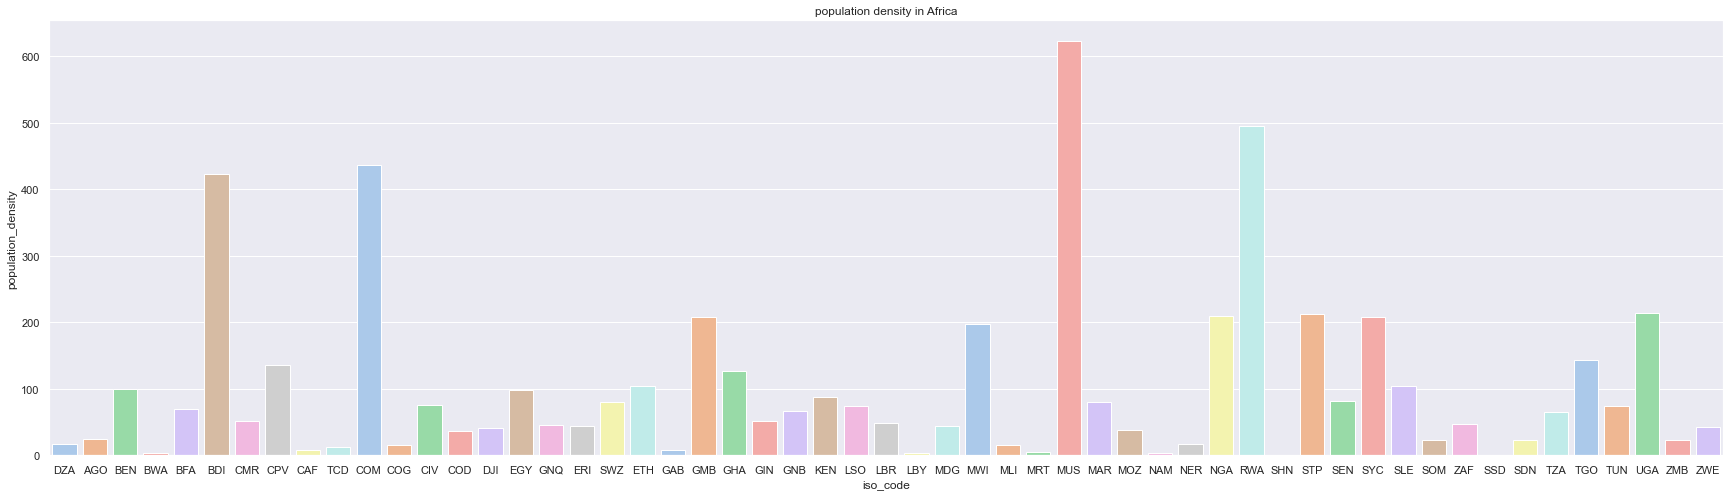

In [108]:
sns.barplot(x="iso_code", y="population_density", data=africa_infect ,palette='pastel').set(title='population density in Africa')

[Text(0.5, 1.0, 'gdp_per_capita in Africa')]

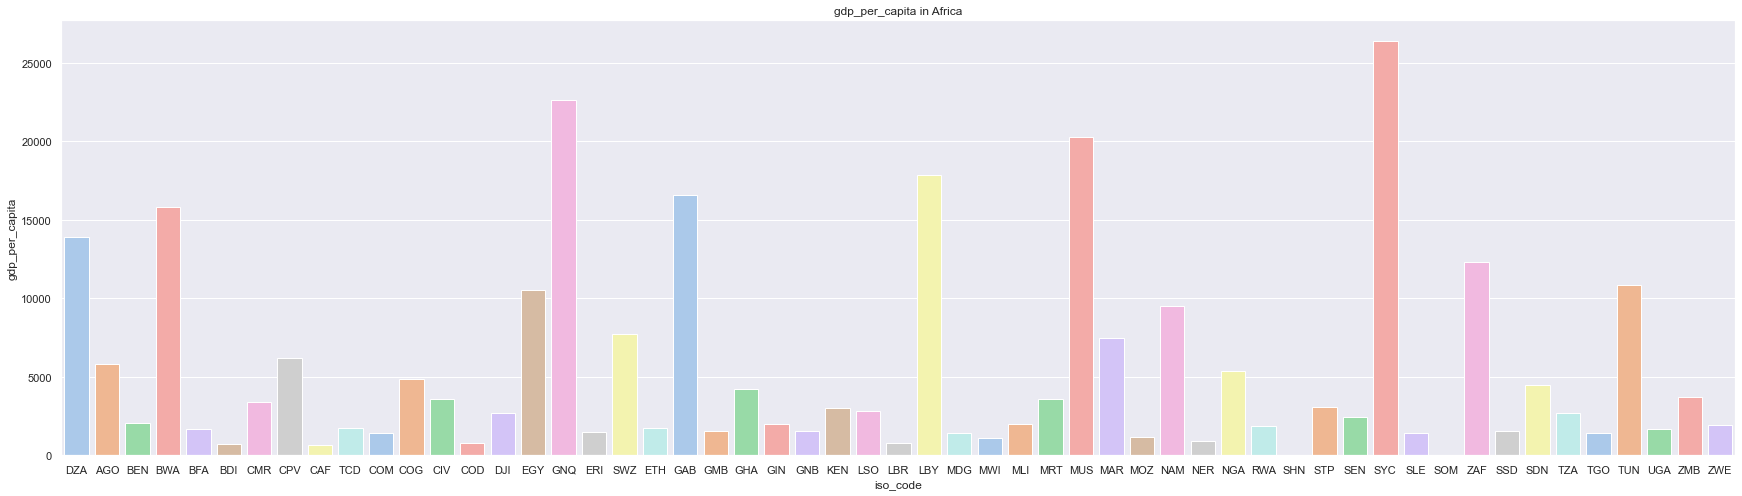

In [109]:
sns.barplot(x="iso_code", y="gdp_per_capita", data=africa_infect ,palette='pastel').set(title='gdp_per_capita in Africa')

[Text(0.5, 1.0, 'Number of aged_65_older')]

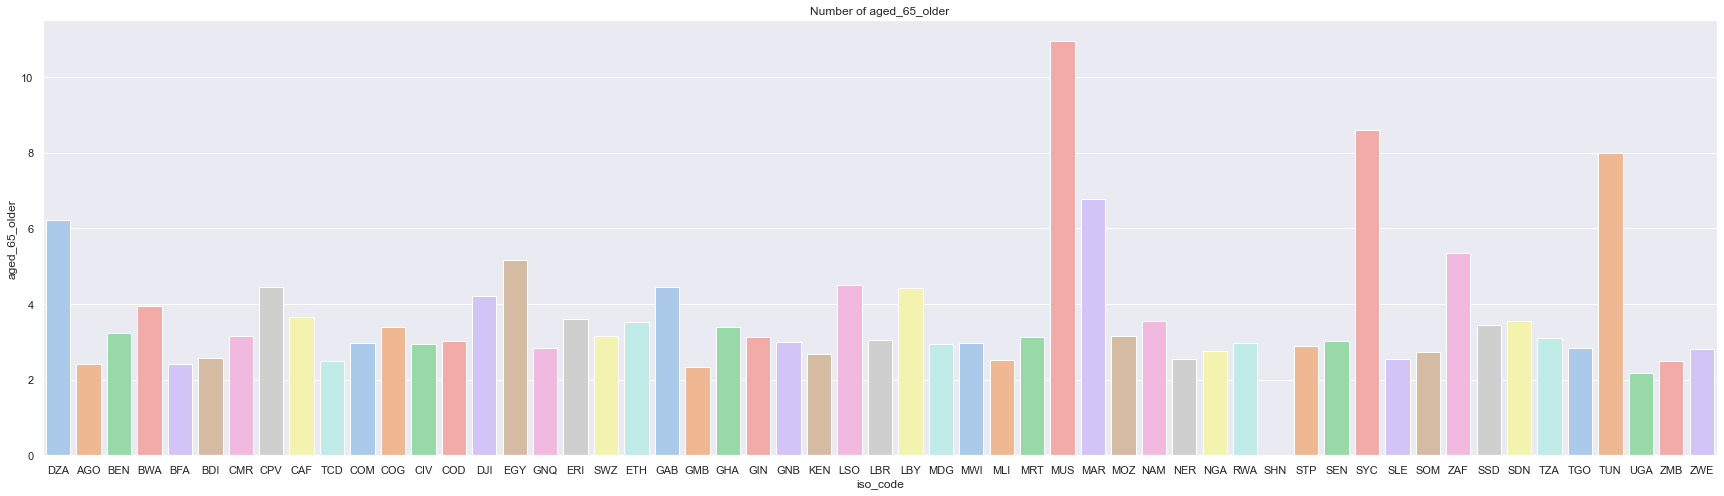

In [110]:
sns.barplot(x="iso_code", y="aged_65_older", data=africa_infect ,palette='pastel').set(title='Number of aged_65_older')

[Text(0.5, 1.0, 'people_fully_vaccinated')]

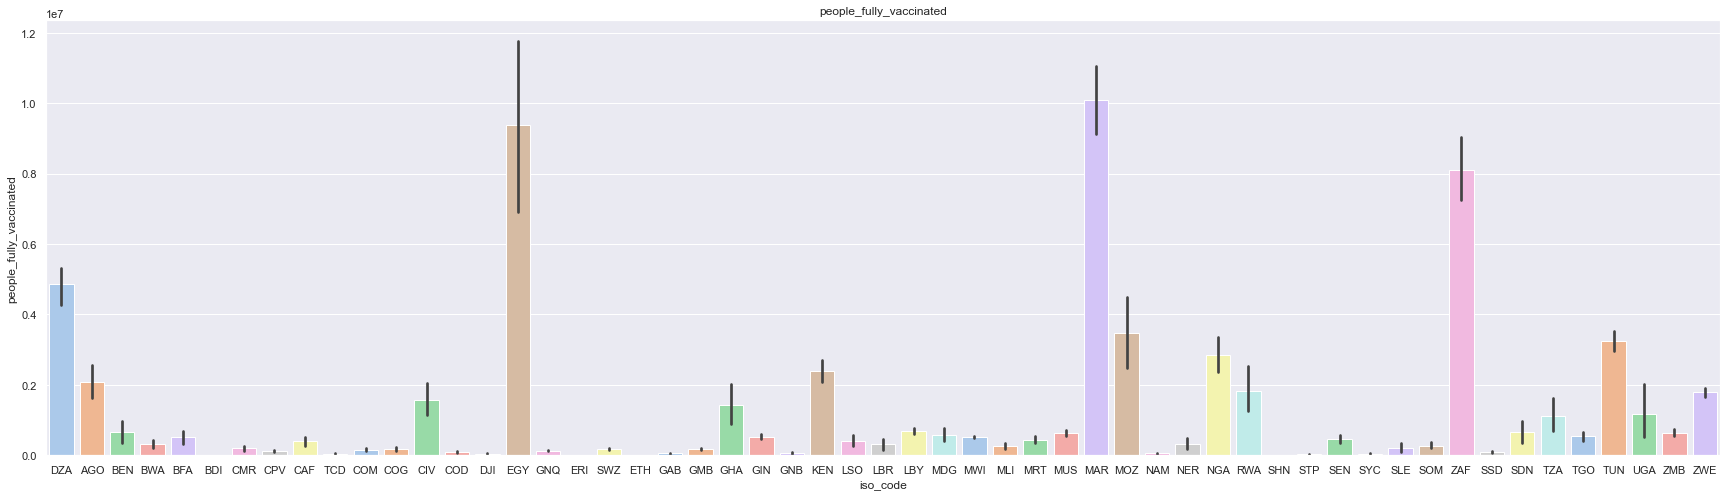

In [111]:
sns.barplot(x="iso_code", y="people_fully_vaccinated", data=africa_infect ,palette='pastel').set(title='people_fully_vaccinated')

### Summary of Asia & Africa<br/>
From the graph above, we can conclude that the preparation of each country is the key to fewer deaths. Singapore, for example, is very densely populated by area, but the population is vaccinated a lot and the country's GDP is very good, resulting in very low infection and mortality rates. Conversely, if a country is poorly prepared or has a low gdp then it can lead to an increase in the rate of infection, for example Turkey is shown on the graph. But this conclusion may be inaccurate depending on the country due to external factors such as Tunisia, everything is quite good, but the mortality rate is high. When we observe it, we can see that because this country has a lot of elderly people, etc.
<br/>

------------------------------------------------------------------------------------------------------------------

# Europe

Text(0.5, 1.0, 'location and population')

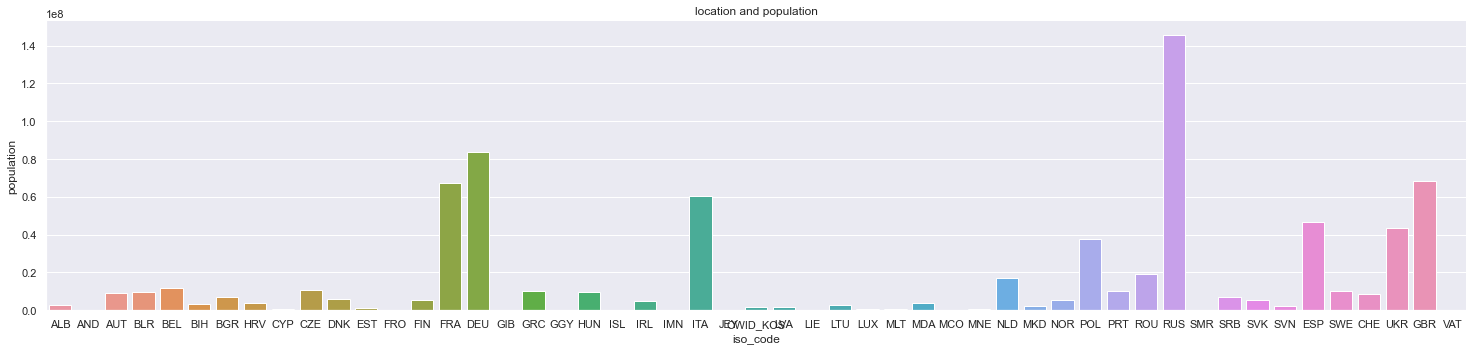

In [112]:
sns.catplot(x='iso_code', y='population', kind='bar', data=europe_infect, aspect=330/80)
plt.title('location and population')

The country with the most people on the continent is RUS or Russi If you look at the graphs that have emerged, it is likely that the highest number of infected people should also be Russia.

Text(0.5, 1.0, 'location')

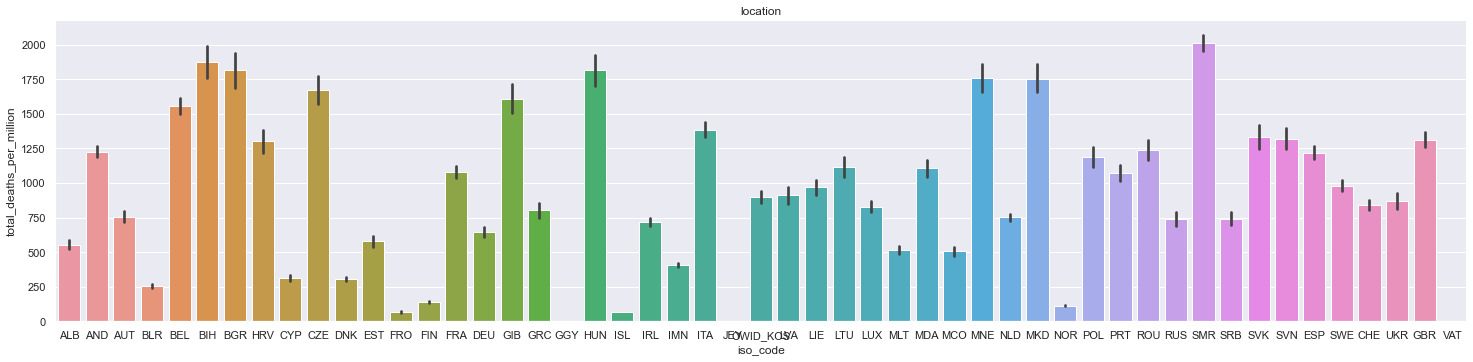

In [113]:
sns.catplot(x='iso_code', y='total_deaths_per_million', kind='bar', data=europe_infect, aspect=330/80)
plt.title('location')

From the graph, the country with the highest number of deaths from COVID-19 is San Marino.
We will find out why this country has the highest number of deaths from Covid-19 in Europe.

We're going to compare San Marino to the country with the lowest number of deaths from coronavirus, Finland.

In [114]:
SMR_FIN_infect = europe_infect[europe_infect['iso_code'].isin(['SMR', 'FIN'])]

<seaborn.axisgrid.FacetGrid object at 0x000002A4C49DF820> <seaborn.axisgrid.FacetGrid object at 0x000002A4C4F506A0>


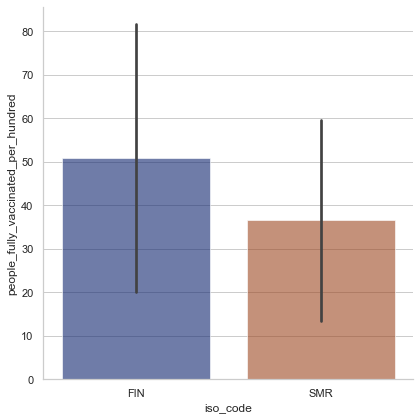

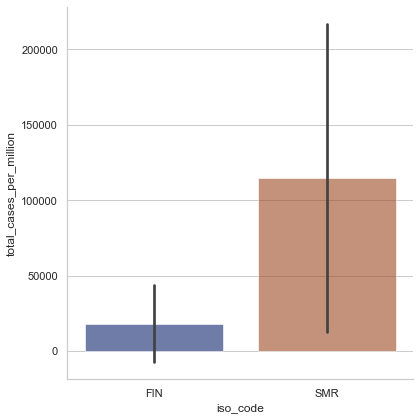

In [115]:
sns.set_theme(style="whitegrid")

fully_vaccinated = sns.catplot(
    data=SMR_FIN_infect, kind="bar",
    x="iso_code", y="people_fully_vaccinated_per_hundred",
    ci="sd", palette="dark", alpha=.6, height=6
)
total_cases = sns.catplot(
    data=SMR_FIN_infect, kind="bar",
    x="iso_code", y="total_cases_per_million",
    ci="sd", palette="dark", alpha=.6, height=6
)
print(total_cases,fully_vaccinated)

From both graphs, I looked at how many countries vaccinate people in both countries. And what you see is that Finland has more vaccinations for people in the country than Russia. This may be one of the reasons Finlan has very few addicts from the second graph.

Two more data collectors were created to measure the number of people infected in the top ten most infected countries and top ten least infected countries

In [116]:
eu_top10_highest_cases = europe_infect.groupby('location', as_index=False).max('date').sort_values('total_cases_per_million', ascending = False).head(10)
eu_top10_lowest_cases = europe_infect.groupby('location', as_index=False).max('date').sort_values('total_cases_per_million', ascending = True).head(10)

<seaborn.axisgrid.FacetGrid object at 0x000002A4C7CDAF70> <seaborn.axisgrid.FacetGrid object at 0x000002A4C4F506D0>


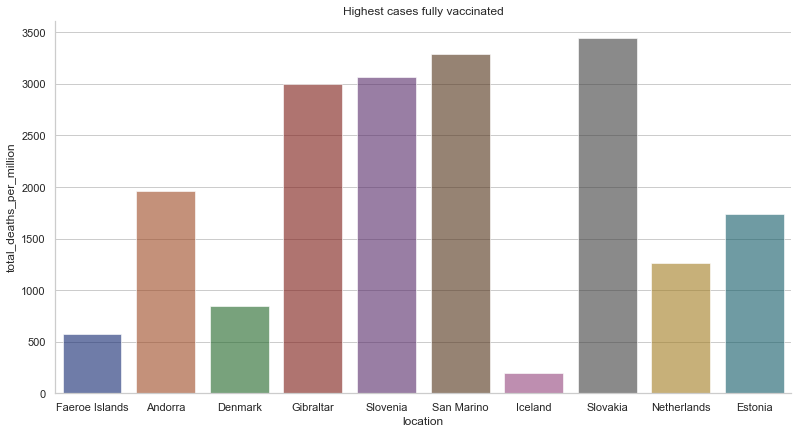

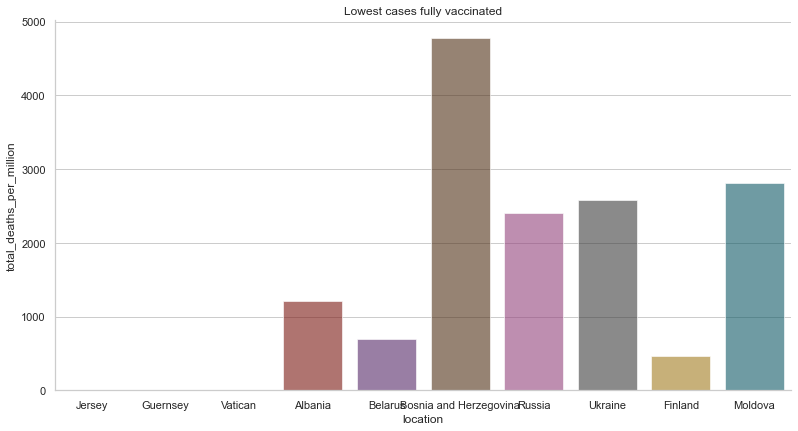

In [117]:
sns.set_theme(style="whitegrid")

highest_vaccinated = sns.catplot(
    data=eu_top10_highest_cases, kind="bar",
    x="location", y="total_deaths_per_million",
    ci="sd", palette="dark", alpha=.6, height=6,aspect=150/80
).set(title='Highest cases fully vaccinated')

lowest_vaccinated = sns.catplot(
    data=eu_top10_lowest_cases, kind="bar",
    x="location", y="total_deaths_per_million",
    ci="sd", palette="dark", alpha=.6, height=6,aspect=150/80 ,
).set(title='Lowest cases fully vaccinated')
print(highest_vaccinated,lowest_vaccinated)

Because there are a lot of people who are addicted, of course, the number of people who have died must be a lot. From the graph, you can see that in the top graph, which is the top ten countries with the most people, all countries have a high number of deaths as well.

----------------------------------------------------------------

# Oceania

Text(0.5, 1.0, 'location and deaths per million')

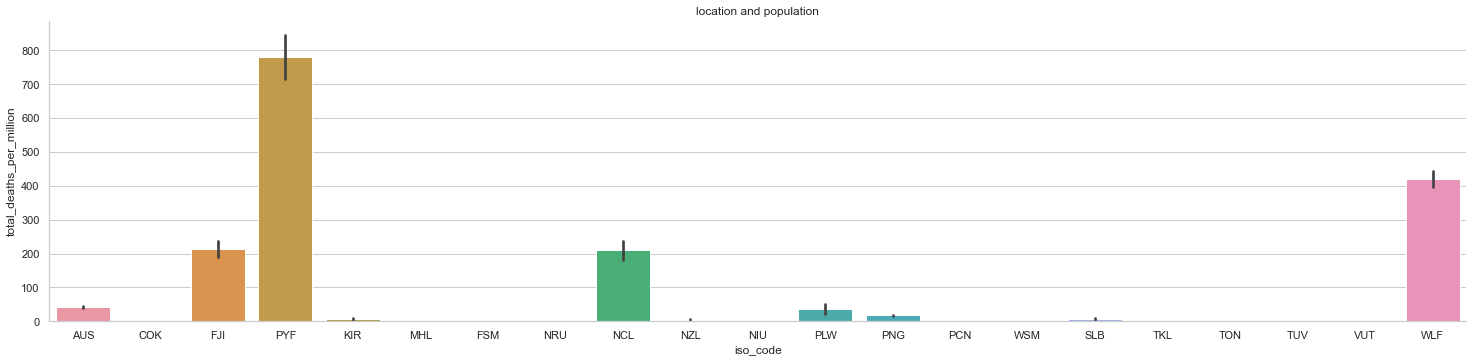

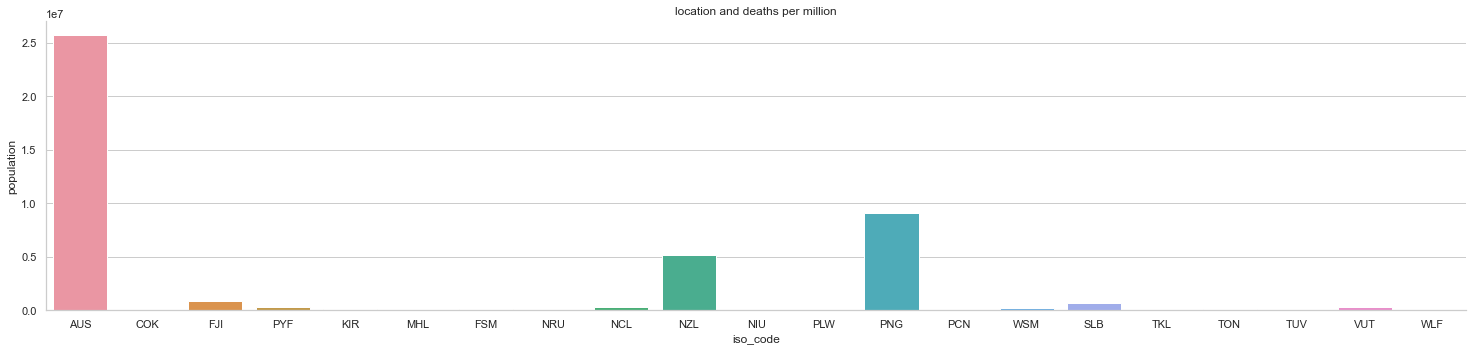

In [118]:
sns.catplot(x='iso_code', y='total_deaths_per_million', kind='bar', data=oceania_infect, aspect=330/80)
plt.title('location and population')

sns.catplot(x='iso_code', y='population', kind='bar', data=oceania_infect, aspect=330/80)
plt.title('location and deaths per million')

Oceania has a lot of incomplete information. But I see some interesting information is that Australia has some interesting data to analyze, so I will create another variable to collect the data of Australia.

In [119]:
AUS_infect = oceania_infect[oceania_infect['iso_code'].isin(['AUS'])]

In [120]:
AUS_infect

,iso_code,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
8944,AUS,Oceania,Australia,2020-01-26,0.155,0.000,44648.71,25788217.0,3.202,0.5,15.504,0.00,NaN,NaN,NaN,NaN,NaN,3.84,NaN
8945,AUS,Oceania,Australia,2020-01-27,0.194,0.000,44648.71,25788217.0,3.202,0.5,15.504,0.00,NaN,NaN,NaN,NaN,NaN,3.84,NaN
8946,AUS,Oceania,Australia,2020-01-28,0.194,0.000,44648.71,25788217.0,3.202,0.5,15.504,0.00,NaN,NaN,NaN,NaN,NaN,3.84,NaN
8947,AUS,Oceania,Australia,2020-01-29,0.233,0.000,44648.71,25788217.0,3.202,0.5,15.504,0.00,NaN,NaN,NaN,NaN,NaN,3.84,NaN
8948,AUS,Oceania,Australia,2020-01-30,0.349,0.000,44648.71,25788217.0,3.202,0.5,15.504,0.00,NaN,NaN,NaN,NaN,NaN,3.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712,AUS,Oceania,Australia,2022-03-04,129697.179,209.476,44648.71,25788217.0,3.202,0.5,15.504,211.02,85.64,79.55,45.83,67.938,4.343,3.84,20513850.0
9713,AUS,Oceania,Australia,2022-03-05,130370.975,210.018,44648.71,25788217.0,3.202,0.5,15.504,211.22,85.66,79.57,45.98,67.356,4.382,3.84,20520964.0
9714,AUS,Oceania,Australia,2022-03-06,131231.136,210.367,44648.71,25788217.0,3.202,0.5,15.504,211.31,85.67,79.59,46.05,70.148,4.537,3.84,20524493.0
9715,AUS,Oceania,Australia,2022-03-07,132974.645,211.880,44648.71,25788217.0,3.202,0.5,15.504,211.61,85.69,79.66,46.25,69.334,4.343,3.84,20543714.0


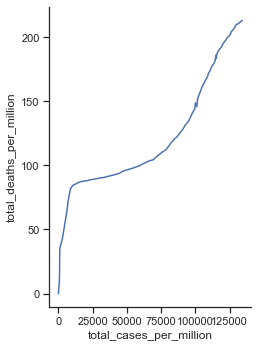

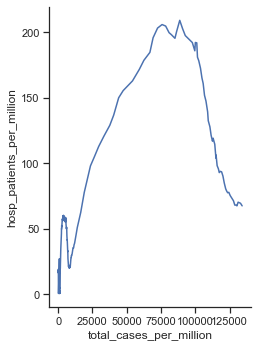

In [121]:
sns.set_theme(style="ticks")
palette = sns.color_palette("rocket_r")

sns.relplot(
    data=AUS_infect,
    x="total_cases_per_million", y="total_deaths_per_million", kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

sns.relplot(
    data=AUS_infect,
    x="total_cases_per_million", y="hosp_patients_per_million", kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

The first graph compares the coronavirus death rate to the very high death rate, as you can see. And the reason for that is because the second graph, which compares people with coronavirus to people who go to the hospital for treatment, at one point where the graph suddenly jumps, is the number of people going to the hospital. Bal is less and the number of people who died in another graph immediately increased.